In [4]:
import matplotlib.pyplot as plt

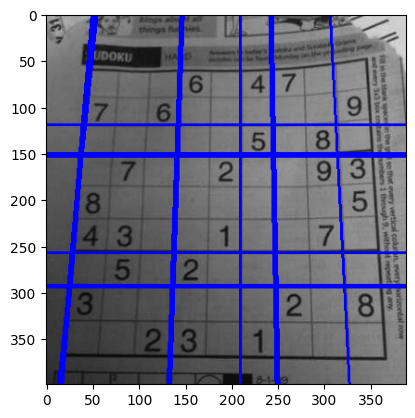

In [8]:
# Chương trình Python minh họa phương thức HoughLine
# để phát hiện đường thẳng
import cv2
import numpy as np

# Đọc ảnh cần thiết
# Thực hiện các phép toán trên ảnh này.
# Đảm bảo ảnh nằm cùng thư mục với chương trình Python này
img = cv2.imread('/content/Sudoku2.png')

# Chuyển đổi ảnh img thành thang xám
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Áp dụng phương pháp phát hiện cạnh trên ảnh
edges = cv2.Canny(gray, 20, 200, apertureSize=3)

# Hàm này trả về một mảng các giá trị r và theta
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# Vòng lặp for bên dưới chạy cho đến khi các giá trị r và theta
# nằm trong phạm vi của mảng 2 chiều
for r_theta in lines:
  arr = np.array(r_theta[0], dtype=np.float64)
  r, theta = arr

  # Lưu trữ giá trị cos(theta) trong a
  a = np.cos(theta)

  # Lưu trữ giá trị sin(theta) trong b
  b = np.sin(theta)

  # x0 lưu trữ giá trị rcos(theta)
  x0 = a * r

  # y0 lưu trữ giá trị rsin(theta)
  y0 = b * r

  # x1 lưu trữ giá trị được làm tròn của (rcos(theta)-1000sin(theta))
  x1 = int(x0 + 1000 * (-b))

  # y1 lưu trữ giá trị được làm tròn của (rsin(theta)+1000cos(theta))
  y1 = int(y0 + 1000 * (a))

  # x2 lưu trữ giá trị được làm tròn của (rcos(theta)+1000sin(theta))
  x2 = int(x0 - 1000 * (-b))

  # y2 lưu trữ giá trị được làm tròn của (rsin(theta)-1000cos(theta))
  y2 = int(y0 - 1000 * (a))

  # cv2.line vẽ một đường thẳng trong img từ điểm (x1, y1) đến (x2, y2).
  # (0, 0, 255) biểu thị màu của đường thẳng được vẽ.
  # Trong trường hợp này, nó có màu đỏ.
  cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(img)


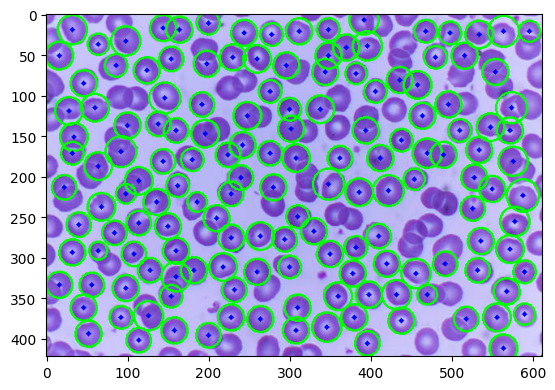

In [11]:
import cv2
import numpy as np

# Đọc ảnh
img = cv2.imread('/content/whitebloodcell1.jpg', cv2.IMREAD_COLOR)

# Chuyển đổi ảnh sang thang xám
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Làm mờ ảnh bằng kernel 3x3
gray_blurred = cv2.blur(gray, (3, 3))

# Áp dụng biến đổi Hough trên ảnh đã làm mờ
detected_circles = cv2.HoughCircles(gray_blurred,
                                    cv2.HOUGH_GRADIENT, 1, 20,
                                    param1=50,
                                    param2=30, minRadius=1, maxRadius=40)

# Vẽ các đường tròn được phát hiện
if detected_circles is not None:

  # Chuyển đổi các tham số đường tròn a, b và r thành số nguyên
  detected_circles = np.uint16(np.around(detected_circles))

  for pt in detected_circles[0, :]:
    a, b, r = pt[0], pt[1], pt[2]

    # Vẽ chu vi của đường tròn
    cv2.circle(img, (a, b), r, (0, 255, 0), 2)

    # Vẽ một đường tròn nhỏ (bán kính 1) để hiển thị tâm
    cv2.circle(img, (a, b), 1, (0, 0, 255), 3)

plt.imshow(img)


<ipython-input-138-9103c964f1ab>:20: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


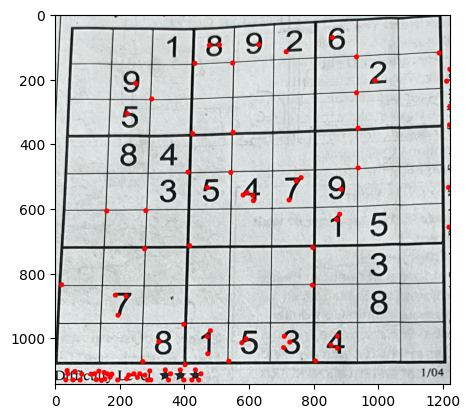

In [138]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Đường dẫn đến ảnh đầu vào được chỉ định và
# ảnh được đọc bằng lệnh imread
img = cv2.imread('/content/sudoku.jpg')

# Chuyển đổi ảnh sang thang xám
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Hàm phát hiện góc Shi-Tomasi
# Ở đây chúng ta chỉ phát hiện 100 góc tốt nhất
# Bạn có thể thay đổi số lượng để có kết quả mong muốn.
corners = cv2.goodFeaturesToTrack(gray_img, 100, 0.01, 10)

# Chuyển đổi giá trị các góc thành số nguyên
# Để có thể vẽ các hình tròn lên chúng
corners = np.int0(corners)

# Vẽ các hình tròn màu đỏ trên tất cả các góc
for i in corners:
  x, y = i.ravel()
  cv2.circle(img, (x, y), 8, (255, 0, 0), -1)

# Hiển thị ảnh kết quả
plt.imshow(img)

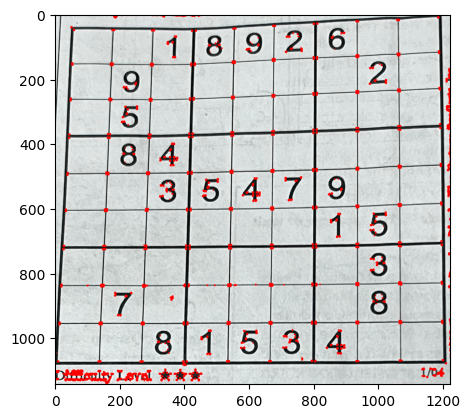

In [139]:
import numpy as np
import cv2 as cv

# Tên file ảnh
filename = '/content/sudoku.jpg'

# Đọc ảnh
img2 = cv.imread(filename)

# Chuyển đổi ảnh sang thang xám
gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# Chuyển đổi ảnh thang xám sang kiểu float32
gray = np.float32(gray)

# Phát hiện góc Harris
dst = cv.cornerHarris(gray, 5, 3, 0.04)

# Làm giãn nở kết quả (dst) để đánh dấu các góc (không quan trọng)
dst = cv.dilate(dst, None)

# Ngưỡng cho giá trị tối ưu, có thể thay đổi tùy theo ảnh
img2[dst > 0.01 * dst.max()] = [255, 0, 0]

# Hiển thị ảnh kết quả
plt.imshow(img2)

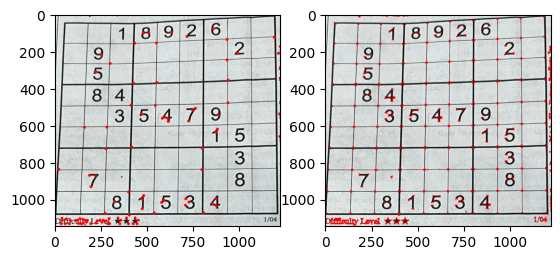

In [140]:
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img2)

In [21]:
import numpy as np
import cv2 as cv
im = cv.imread('/content/sudoku4.JPG')
assert im is not None, "file could not be read, check with os.path.exists()"
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

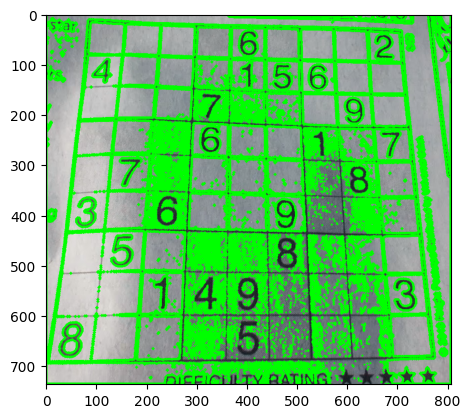

In [25]:
img=cv.drawContours(im, contours, -1, (0,255,0), 3)
plt.imshow(img)